In [6]:
pip install imgaug

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\asdan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import random
from scipy import misc


# Load Dataset

(6000, 90, 90, 1)
(6000, 90, 90, 1)


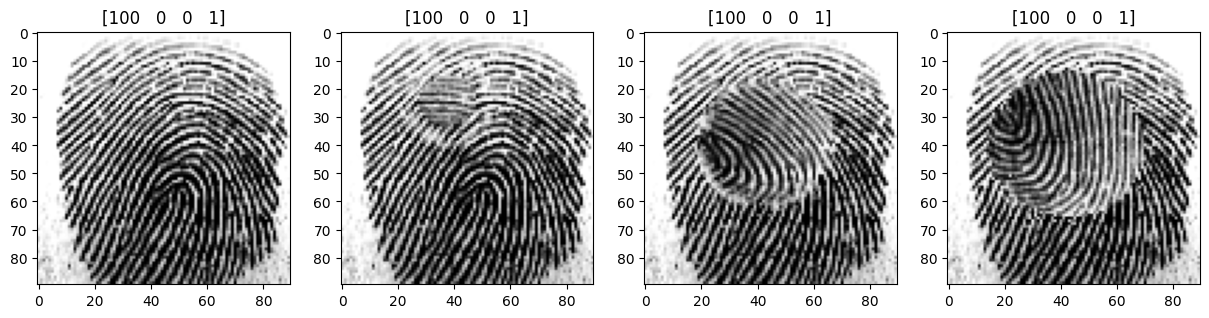

In [8]:
x_real = np.load('dataset/x_real.npz')['data']
y_real = np.load('dataset/y_real.npy')
x_easy = np.load('dataset/x_easy.npz')['data']
y_easy = np.load('dataset/y_easy.npy')
x_medium = np.load('dataset/x_medium.npz')['data']
y_medium = np.load('dataset/y_medium.npy')
x_hard = np.load('dataset/x_hard.npz')['data']
y_hard = np.load('dataset/y_hard.npy')

print(x_real.shape)

# x_real_pad = np.pad(x_real, ((0, 0), (35, 35), (5,5), (0, 0)), mode='constant',constant_values=255)
# x_easy= np.pad(x_easy, ((0, 0), (27,27), (0, 0), (0, 0)), mode='constant',constant_values=255)
# x_medium = np.pad(x_medium, ((0, 0),(27,27), (0, 0), (0, 0)), mode='constant',constant_values=255)
# x_hard = np.pad(x_hard, ((0, 0), (27,27), (0, 0), (0, 0)), mode='constant',constant_values=255)


# print("x_real shape:", x_real.shape, " size:", x_real.size)
# print("x_easy shape:", x_easy.shape, " size:", x_easy.size)
# print("x_medium shape:", x_medium.shape, " size:", x_medium.size)
# print("x_hard shape:", x_hard.shape, " size:", x_hard.size)
# print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)
plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)
plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)
plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')
print(x_real.shape)


# Train Test Split

In [4]:
from skimage.transform import resize
print('Old Shapes')
print(x_real.shape)
print(x_easy.shape)
print(x_medium.shape)
print(x_hard.shape)

x_real = np.array([resize(img, (144, 90), order=3, preserve_range=True) for img in x_real])
# x_easy = np.array([resize(img, (160, 100), order=3, preserve_range=True) for img in x_easy])
# x_medium = np.array([resize(img, (160, 100), order=3, preserve_range=True) for img in x_medium])
# x_hard = np.array([resize(img, (160, 100), order=3, preserve_range=True) for img in x_hard])

print('New Shapes')
print(x_real.shape)
print(x_easy.shape)
print(x_medium.shape)
print(x_hard.shape)

Old Shapes
(6000, 90, 90, 1)
(17931, 90, 90, 1)
(17067, 90, 90, 1)
(14272, 90, 90, 1)
New Shapes
(6000, 144, 90, 1)
(17931, 90, 90, 1)
(17067, 90, 90, 1)
(14272, 90, 90, 1)


In [5]:
x_easy = np.array([resize(img, (144, 90), order=3, preserve_range=True) for img in x_easy])
print(x_easy.shape)
x_medium = np.array([resize(img, (144, 90), order=3, preserve_range=True) for img in x_medium])
print(x_medium.shape)
x_hard = np.array([resize(img, (144, 90), order=3, preserve_range=True) for img in x_hard])
print(x_hard.shape)


(17931, 144, 90, 1)
(17067, 144, 90, 1)
(14272, 144, 90, 1)


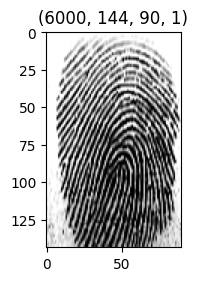

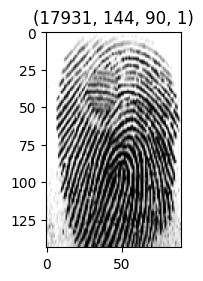

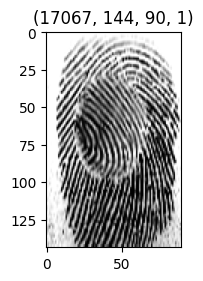

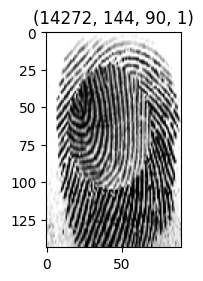

In [6]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 4, 1)
plt.title(x_real.shape)
plt.imshow(x_real[0].squeeze(), cmap='gray')

plt.figure(figsize=(8, 4))
plt.subplot(1, 4, 1)
plt.title(x_easy.shape)
plt.imshow(x_easy[0].squeeze(), cmap='gray')


plt.figure(figsize=(8, 4))
plt.subplot(1, 4, 1)
plt.title(x_medium.shape)
plt.imshow(x_medium[0].squeeze(), cmap='gray')

plt.figure(figsize=(8, 4))
plt.subplot(1, 4, 1)
plt.title(x_hard.shape)
plt.imshow(x_hard[0].squeeze(), cmap='gray')

In [7]:
x_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)

x_train, x_val, label_train, label_val = train_test_split(x_data, label_data, test_size=0.1)
print(x_data.shape, label_data.shape)
print(x_train.shape, label_train.shape)
print(x_val.shape, label_val.shape)

(49270, 144, 90, 1) (49270, 4)
(44343, 144, 90, 1) (44343, 4)
(4927, 144, 90, 1) (4927, 4)


# Preview Augmentation

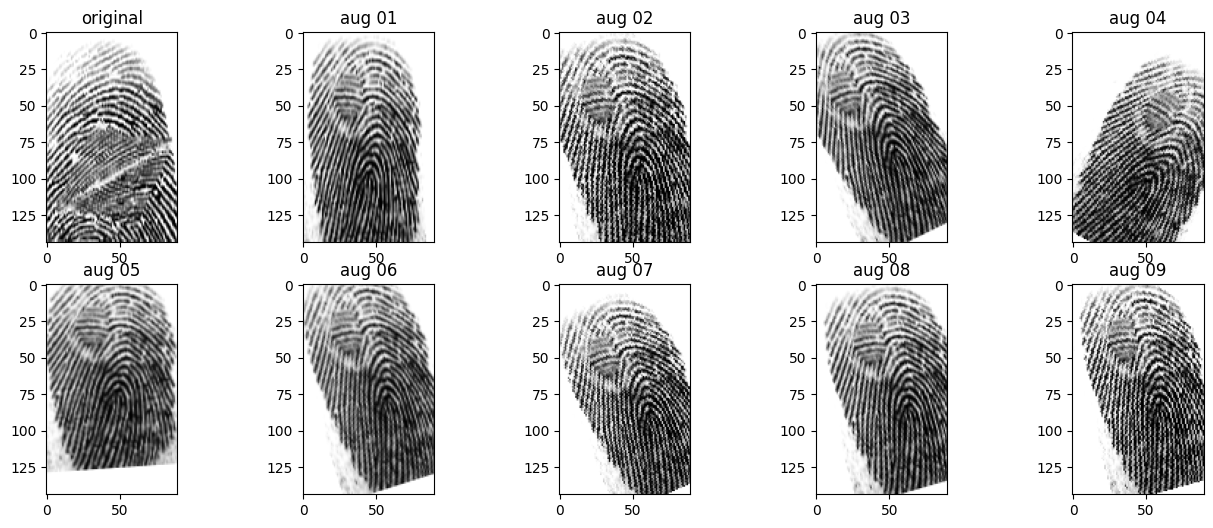

In [8]:
augs = [x_data[0]] * 9

seq = iaa.Sequential([
    # blur images with a sigma of 0 to 0.5
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        # scale images to 90-110% of their size, individually per axis
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        # translate by -10 to +10 percent (per axis)
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        # rotate by -30 to +30 degrees
        rotate=(-30, 30),
        # use nearest neighbour or bilinear interpolation (fast)
        order=[0, 1],
        # if mode is constant, use a cval between 0 and 255
        cval=255
    )
], random_order=True)

augs = seq.augment_images(augs)

plt.figure(figsize=(16, 6))
plt.subplot(2, 5, 1)
plt.title('original')
plt.imshow(x_data[40000].squeeze(), cmap='gray')
for i, aug in enumerate(augs):
    plt.subplot(2, 5, i+2)
    plt.title('aug %02d' % int(i+1))
    plt.imshow(aug.squeeze(), cmap='gray')

# Make Label Dictionary Lookup Table

In [9]:
label_real_dict = {}

for i, y in enumerate(y_real):
    key = y.astype(str)
    key = ''.join(key).zfill(6)

    label_real_dict[key] = i

# Data Generator

In [10]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, x, label, x_real, label_real_dict, batch_size=32, shuffle=True):
        'Initialization'
        self.x = x
        self.label = label
        self.x_real = x_real
        self.label_real_dict = label_real_dict
        
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        x1_batch = self.x[index*self.batch_size:(index+1)*self.batch_size]
        label_batch = self.label[index*self.batch_size:(index+1)*self.batch_size]
        
        x2_batch = np.empty((self.batch_size, 144,90, 1), dtype=np.float32)
        y_batch = np.zeros((self.batch_size, 1), dtype=np.float32)
        
        # augmentation
        if self.shuffle:
            seq = iaa.Sequential([
                iaa.GaussianBlur(sigma=(0, 0.5)),
                iaa.Affine(
                    scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
                    translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                    rotate=(-30, 30),
                    order=[0, 1],
                    cval=255
                )
            ], random_order=True)

            x1_batch = seq.augment_images(x1_batch)
        
        # pick matched images(label 1.0) and unmatched images(label 0.0) and put together in batch
        # matched images must be all same, [subject_id(3), gender(1), left_right(1), finger(1)], e.g) 034010
        for i, l in enumerate(label_batch):
            match_key = l.astype(str)
            match_key = ''.join(match_key).zfill(6)

            if random.random() > 0.5:
                # put matched image
                x2_batch[i] = self.x_real[self.label_real_dict[match_key]]
                y_batch[i] = 1.
            else:
                # put unmatched image
                while True:
                    unmatch_key, unmatch_idx = random.choice(list(self.label_real_dict.items()))

                    if unmatch_key != match_key:
                        break

                x2_batch[i] = self.x_real[unmatch_idx]
                y_batch[i] = 0.

        return [x1_batch.astype(np.float32) / 255., x2_batch.astype(np.float32) / 255.], y_batch

    def on_epoch_end(self):
        if self.shuffle == True:
            self.x, self.label = shuffle(self.x, self.label)

In [11]:
train_gen = DataGenerator(x_train, label_train, x_real, label_real_dict, shuffle=True)
val_gen = DataGenerator(x_val, label_val, x_real, label_real_dict, shuffle=False)

# Create Model

In [13]:
x1 = layers.Input(shape=(144,90, 1))
x2 = layers.Input(shape=(144,90, 1))

# share weights both inputs
inputs = layers.Input(shape=(144,90,1))

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(inputs)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(feature)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature_model = Model(inputs=inputs, outputs=feature)

# 2 feature models that sharing weights
x1_net = feature_model(x1)
x2_net = feature_model(x2)

# subtract features
net = layers.Subtract()([x1_net, x2_net])

net = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(net)
net = layers.MaxPooling2D(pool_size=2)(net)

net = layers.Flatten()(net)

net = layers.Dense(64, activation='relu')(net)

net = layers.Dense(1, activation='sigmoid')(net)

model = Model(inputs=[x1, x2], outputs=net)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 144, 90, 1)]         0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 144, 90, 1)]         0         []                            
                                                                                                  
 model (Functional)          (None, 36, 22, 32)           9568      ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 subtract (Subtract)         (None, 36, 22, 32)           0         ['model[0][0]',      

# Train

In [ ]:
history = model.fit_generator(train_gen, epochs=15, validation_data=val_gen)

C:\Users\ibrahim ismail\AppData\Local\Temp\ipykernel_2716\3063625660.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=15, validation_data=val_gen)


Epoch 1/15


1385/1385 [==============================] - 251s 180ms/step - loss: 0.2440 - acc: 0.8957 - val_loss: 0.0705 - val_acc: 0.9728
Epoch 2/15
1385/1385 [==============================] - 239s 172ms/step - loss: 0.1462 - acc: 0.9435 - val_loss: 0.0303 - val_acc: 0.9894
Epoch 3/15
1385/1385 [==============================] - 264s 190ms/step - loss: 0.1207 - acc: 0.9535 - val_loss: 0.0553 - val_acc: 0.9806
Epoch 4/15
1385/1385 [==============================] - 240s 173ms/step - loss: 0.1015 - acc: 0.9619 - val_loss: 0.0296 - val_acc: 0.9896
Epoch 5/15
1385/1385 [==============================] - 235s 170ms/step - loss: 0.0900 - acc: 0.9668 - val_loss: 0.0202 - val_acc: 0.9912
Epoch 6/15
1385/1385 [==============================] - 634s 458ms/step - loss: 0.0823 - acc: 0.9690 - val_loss: 0.0207 - val_acc: 0.9939
Epoch 7/15
1385/1385 [==============================] - 260s 188ms/step - loss: 0.0702 - acc: 0.9742 - val_loss: 0.0150 - val_acc: 0.9935
Epoch 8/15
1385/1385 [==========

In [9]:
from tensorflow.keras.models import model_from_json
def save_model(model, filepath):
    # Save the model weights and architecture
    model.save_weights(filepath + '_weights.h5')
    with open(filepath + '_architecture.json', 'w') as f:
        f.write(model.to_json())

        
def load_model(filepath):
    # Load the model architecture
    with open(filepath + '_architecture.json', 'r') as f:
        loaded_model = model_from_json(f.read())
    # Load the model weights
    loaded_model.load_weights(filepath + '_weights.h5')
    return loaded_model

In [ ]:
save_model(model, 'good_model')
 

In [13]:
from tensorflow.keras.models import model_from_json
mp = load_model('good_model')

TypeError: Could not locate class 'Functional'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'class_name': 'Functional', 'config': {'name': 'model_1', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 144, 90, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'registered_name': None, 'name': 'input_1', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 144, 90, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_2'}, 'registered_name': None, 'name': 'input_2', 'inbound_nodes': []}, {'module': 'keras.src.engine.functional', 'class_name': 'Functional', 'config': {'name': 'model', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 144, 90, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_3'}, 'registered_name': None, 'name': 'input_3', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 144, 90, 1]}, 'name': 'conv2d', 'inbound_nodes': [[['input_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 144, 90, 32]}, 'name': 'max_pooling2d', 'inbound_nodes': [[['conv2d', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 72, 45, 32]}, 'name': 'conv2d_1', 'inbound_nodes': [[['max_pooling2d', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 72, 45, 32]}, 'name': 'max_pooling2d_1', 'inbound_nodes': [[['conv2d_1', 0, 0, {}]]]}], 'input_layers': [['input_3', 0, 0]], 'output_layers': [['max_pooling2d_1', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': [None, 144, 90, 1]}, 'name': 'model', 'inbound_nodes': [[['input_1', 0, 0, {}]], [['input_2', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Subtract', 'config': {'name': 'subtract', 'trainable': True, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 36, 22, 32], [None, 36, 22, 32]]}, 'name': 'subtract', 'inbound_nodes': [[['model', 1, 0, {}], ['model', 2, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 36, 22, 32]}, 'name': 'conv2d_2', 'inbound_nodes': [[['subtract', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 36, 22, 32]}, 'name': 'max_pooling2d_2', 'inbound_nodes': [[['conv2d_2', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 18, 11, 32]}, 'name': 'flatten', 'inbound_nodes': [[['max_pooling2d_2', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 6336]}, 'name': 'dense', 'inbound_nodes': [[['flatten', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64]}, 'name': 'dense_1', 'inbound_nodes': [[['dense', 0, 0, {}]]]}], 'input_layers': [['input_1', 0, 0], ['input_2', 0, 0]], 'output_layers': [['dense_1', 0, 0]]}, 'keras_version': '2.15.0', 'backend': 'tensorflow'}

In [12]:
test_datax = np.concatenate([x_easy,x_medium], axis=0)
test_datay = np.concatenate([y_easy,y_medium], axis=0)

KeyboardInterrupt: 

# Evaluation

4399
4365 4399
1/1 [==============================] - 1s 1s/step


C:\Users\asdan\AppData\Local\Temp\ipykernel_18284\4145581054.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('O: %.02f, %s' % (pred_rx, ry))


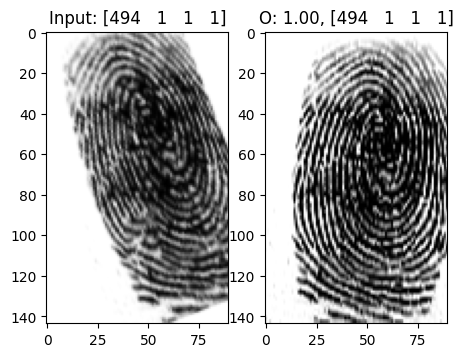

In [13]:
import random as random
from collections import defaultdict
# new user fingerprint input
random_idx = random.randint(0, len(x_val))
# random_idx=2995
random_img = x_val[random_idx]
random_label = label_val[random_idx]

seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-30, 30),
        order=[0, 1],
        cval=255
    )
], random_order=True)

random_img = seq.augment_image(random_img).reshape((1, 144, 90, 1)).astype(np.float32) / 255.
# plt.figure(figsize=(8, 4))
# plt.subplot(1, 3, 1)
# plt.title('Input: %s' %random_label)
# plt.imshow(random_img.squeeze(), cmap='gray')

ans=100.0
ansx=None
ansy=None
l=0
r=len(x_real)
print(random_idx)
# while l<r:
#     rx = x_real[l].reshape((1, 144, 90, 1)).astype(np.float32) / 255.
#     ry = y_real[l]
#     pred_rx=model.predict([random_img,rx])
#     print(l)
#     if pred_rx>ans:
#         ans=pred_rx
#         ansx=rx
#         ansy=ry
#     l+=1


# plt.figure(figsize=(8, 4))
# plt.subplot(1, 3, 1)
# plt.title('Input: %s' %random_label)
# plt.imshow(random_img.squeeze(), cmap='gray')
# plt.subplot(1, 3, 2)
# plt.title('O: %.02f, %s' % (ans, ansy))
# plt.imshow(ansx.squeeze(), cmap='gray')

# matched image
match_key = random_label.astype(str)
match_key = ''.join(match_key).zfill(6)
print (label_real_dict[match_key],random_idx)
rx = x_real[label_real_dict[match_key]].reshape((1, 144, 90, 1)).astype(np.float32) / 255.
ry = y_real[label_real_dict[match_key]]

pred_rx = mp.predict([random_img, rx])

# # unmatched image
# unmatch_key, unmatch_idx = random.choice(list(label_real_dict.items()))

# ux = x_real[unmatch_idx].reshape((1, 90, 90, 1)).astype(np.float32) / 255.
# uy = y_real[unmatch_idx]

# # pred_ux = mp.predict([random_img, ux])

plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img.squeeze(), cmap='gray')
plt.subplot(1, 3, 2)
plt.title('O: %.02f, %s' % (pred_rx, ry))
plt.imshow(rx.squeeze(), cmap='gray')

# plt.subplot(1, 3, 3)
# plt.title('X: %.02f, %s' % (pred_ux, uy))
# plt.imshow(ux.squeeze(), cmap='gray')


# 605_M_Left_index_finger

1/1 [==============================] - 0s 159ms/step
[[0.58892584]]
1/1 [==============================] - 0s 199ms/step
[[0.8636874]]
1/1 [==============================] - 0s 38ms/step
[[0.99959373]]
1/1 [==============================] - 0s 34ms/step


C:\Users\asdan\AppData\Local\Temp\ipykernel_18284\3754640455.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('O: %.10f, %s' % (ans1, ansyy))


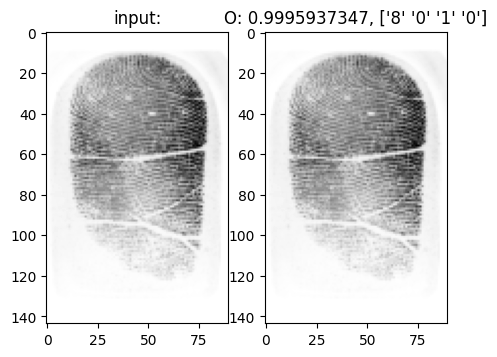

In [14]:
X = np.load('dataset_1/foot_1.npz')
Y =  np.load('dataset_1/trgt_foot.npy')
random_idx1 = random.randint(0, len(X)-1)
# random_idx=2995
random_img1 = X[random_idx1]
random_label1=Y[random_idx1]
seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-30, 30),
        order=[0, 1],
        cval=255
    )
], random_order=True)

random_img1 = random_img1.reshape((1, 144, 90, 1)).astype(np.float32) #/ 255.
ans1=0.0
ansxx=None
ansyy=None
l=0
r=len(X)
while l<r:
    rxx = X[l].reshape((1, 144, 90, 1)).astype(np.float32) #/ 255.
    ryy=Y[l]
    pred_rxx=mp.predict([random_img1,rxx])
    # print(pred_rxx)
    if pred_rxx>ans1:
        print (pred_rxx)
        ans1=pred_rxx
        ansxx=rxx
        ansyy=ryy
    
    l+=1
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.title('input:' )
plt.imshow(random_img1.squeeze(), cmap='gray')
plt.subplot(1, 3, 2)
plt.title('O: %.10f, %s' % (ans1, ansyy))
# plt.title('%.07f'% ans1)
plt.imshow(ansxx.squeeze(), cmap='gray')


In [ ]:
X = np.load('foot.npz')
Y=np.load('target2.npy')
random_idx1 = random.randint(0, len(X))
# random_idx=2995
random_img1 = X[random_idx1]
# random_label1=Y[random_idx1]
seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-30, 30),
        order=[0, 1],
        cval=255
    )
], random_order=True)

random_img1 = random_img1.reshape((1, 144, 90, 1)).astype(np.float32) / 255.
ans1=100.0
ansxx=None
ansyy=None
l=0
r=len(X)
while l<r:
    rxx = X[l].reshape((1, 144, 90, 1)).astype(np.float32) / 255.
    # ryy=Y[l]
    pred_rxx=mp.predict([random_img1,rxx])
    print(pred_rxx)
    if pred_rxx<ans1:
    
        ans1=pred_rxx
        print(ans1)
        ansxx=X[l]
        # ansyy=Y[l]
    l+=1
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.title('input: %s' %  random_label1)
# plt.title('input: ')
plt.imshow(random_img1.squeeze(), cmap='gray')
plt.subplot(1, 3, 2)
plt.title('O: %.07f, %s' % (ans1, ansyy))
plt.imshow(ansxx.squeeze(), cmap='gray')


In [2]:
from flask import Flask, request, jsonify, send_file
from PIL import Image
import io
import os

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import random
from scipy import misc

app = Flask(__name__)


# def load_model(filepath):
#     # Load the model architecture
#     with open(filepath + '_architecture.json', 'r') as f:
#         loaded_model = model_from_json(f.read())
#     # Load the model weights
#     loaded_model.load_weights(filepath + '_weights.h5')
#     return loaded_model


# model = load_model('good_model')


def preprocess():
    photos_directory = "C:\\Users\\asdan\Desktop\\20200203_20200055_20200436\\data\\"

    # Define the pattern to match image files (you can adjust this pattern if needed)
    image_files_pattern = "*.bmp"
    finger_mapping = {'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3, 'little': 4}
    # Initialize lists to store image data and target labels
    image_data = []
    target_labels = []
    for filename in os.listdir(photos_directory):
        if filename.endswith(".BMP"):
            subject_id, gender, lr, finger, _ = filename.split('_')
            # gender, lr, finger, _ = etc.split('_')
            gender = 0 if gender == 'M' else 1
            lr = 0 if lr == 'Left' else 1

            if finger == 'thumb':
                finger = 0
            elif finger == 'index':
                finger = 1
            elif finger == 'middle':
                finger = 2
            elif finger == 'ring':
                finger = 3
            elif finger == 'little':
                finger = 4
            target_labels.append([subject_id, gender, lr, finger])
            path = photos_directory + filename
            img = Image.open(path)

            if img.mode != 'RGB':
                # print(img.mode)
                img = img.convert('RGB')

            resized_photo = img.resize((90, 144))
            # print(resized_photo.size)
            img_np_array = np.array(resized_photo)
            gray_image = rgb2gray(img_np_array)
            gray_image = np.expand_dims(gray_image, axis=-1)
            real_photo = gray_image.astype(np.float32)

            image_data.append(real_photo)

    # Convert lists to NumPy arrays
    image_data = np.array(image_data)
    target_labels = np.array(target_labels)
    return image_data,target_labels

def exe():
    photo="C:\\Users\\asdan\Desktop\\20200203_20200055_20200436\\data\\1_M_Left_index_finger.BMP"
    img = Image.open(photo)
    if img.mode != 'RGB':
        # print(img.mode)
        img = img.convert('RGB')

    resized_photo = img.resize((90, 144))
    img_np_array = np.array(resized_photo)
    gray_image = rgb2gray(img_np_array)
    gray_image = np.expand_dims(gray_image, axis=-1)
    real_photo = gray_image.astype(np.float32)
    image_data, target = preprocess()
    ans=0
    ansy=-1
    for i in range(len(image_data)):
        pre=model.predict(real_photo,image_data[i].reshape((1, 144, 90, 1)).astype(np.float32))
        if ans<pre:
            ansy=target[i][0]
            ans=pre
    print(ansy)

# Endpoint to receive and process uploaded images
# @app.route('/upload', methods=['POST'])
# def upload():
#     # Check if the POST request has the file part
#     if 'image' not in request.files:
#         return jsonify({'error': 'No image provided'}), 400
#
#     # Get the image file from the POST request
#     image_file = request.files['image']
#
#     # Read the image using Pillow (PIL)
#     try:
#         img = Image.open(image_file)
#     except Exception as e:
#         return jsonify({'error': 'Invalid image file'}), 400
#
#     # Process the image (e.g., resize, apply filters, etc.)
#     # Example: Resize the image to 128x128 pixels
#     img.thumbnail((128, 128))
#
#     # Prepare the image data to send back as a response
#     img_byte_arr = io.BytesIO()
#     img.save(img_byte_arr, format='BMP')
#     img_byte_arr.seek(0)
#     image_data,target=preprocess()
#     model.predict()
#     # Return the processed image as a response
#     return send_file(img_byte_arr, mimetype='image/png')

# Run the app
# if __name__ == '__main__':
#      app.run(debug=True)


exe()

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'